In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
bb1=pd.read_csv("Fraud_check.csv")

In [3]:
bb1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
bb1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
bb1[bb1['Taxable.Income']<= 30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [6]:
group_names = ['Risky', 'Good']
bb1['Fraud_Check']=pd.cut(bb1['Taxable.Income'], bins = [0,30000,1000000], labels = group_names)

In [7]:
for i in range(0,len(bb1['Taxable.Income'])):
    if bb1['Taxable.Income'][i]<=30000:
        bb1['Fraud_Check'][i] = 'Risky'
    else:
        bb1['Fraud_Check'][i] = 'Good'

In [8]:
bb1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [9]:
bb1["Taxable.Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [10]:
bb1['Fraud_Check'].value_counts()

Good     476
Risky    124
Name: Fraud_Check, dtype: int64

In [12]:
bb1["Fraud.Check"]=bb1["Fraud_Check"].replace(['Risky','Good'],[0,1])
bb1['Urban']=bb1['Urban'].replace(['YES','NO'],[1,0])
bb1['Undergrad']=bb1['Undergrad'].replace(['YES','NO'],[1,0])
bb1["Marital.Status"]=bb1["Marital.Status"].replace(['Single','Divorced','Married'],[0,1,2])

In [13]:
bb1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check,Fraud.Check
0,0,0,68833,50047,10,1,Good,1
1,1,1,33700,134075,18,1,Good,1
2,0,2,36925,160205,30,1,Good,1
3,1,0,50190,193264,15,1,Good,1
4,0,2,81002,27533,28,0,Good,1
...,...,...,...,...,...,...,...,...
595,1,1,76340,39492,7,1,Good,1
596,1,1,69967,55369,2,1,Good,1
597,0,1,47334,154058,0,1,Good,1
598,1,2,98592,180083,17,0,Good,1


In [14]:
bb1['Fraud_Check'].value_counts()

Good     476
Risky    124
Name: Fraud_Check, dtype: int64

In [15]:
bb1['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [16]:
bb1['Marital.Status'].value_counts()

0    217
2    194
1    189
Name: Marital.Status, dtype: int64

# Splitting data

In [17]:
bb1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check,Fraud.Check
0,0,0,68833,50047,10,1,Good,1
1,1,1,33700,134075,18,1,Good,1
2,0,2,36925,160205,30,1,Good,1
3,1,0,50190,193264,15,1,Good,1
4,0,2,81002,27533,28,0,Good,1


In [18]:
bb1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Fraud_Check', 'Fraud.Check'],
      dtype='object')

In [21]:
bb=bb1[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban','Fraud_Check']]

In [30]:
bb.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Fraud_Check
0,0,0,50047,10,1,Good
1,1,1,134075,18,1,Good
2,0,2,160205,30,1,Good
3,1,0,193264,15,1,Good
4,0,2,27533,28,0,Good


In [33]:
X=bb.iloc[:,:-1]
Y=bb.iloc[:,-1]

In [34]:
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,1,134075,18,1
2,0,2,160205,30,1
3,1,0,193264,15,1
4,0,2,27533,28,0


In [35]:
Y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Fraud_Check, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [36]:
bb1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Fraud_Check', 'Fraud.Check'],
      dtype='object')

# Splitting data into train and test data

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [38]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
284,0,1,188383,22,1
423,0,2,80249,19,1
525,1,0,75307,23,0
519,1,0,162102,25,1
12,0,1,148033,14,1
...,...,...,...,...,...
369,0,2,89122,28,0
320,1,0,78897,11,1
527,0,2,180274,27,0
125,1,1,155669,11,0


In [39]:
y_train

284    Risky
423     Good
525     Good
519     Good
12     Risky
       ...  
369     Good
320     Good
527     Good
125     Good
265    Risky
Name: Fraud_Check, Length: 480, dtype: category
Categories (2, object): ['Risky' < 'Good']

# Building Decision Tree Classifier using gini Criteria

In [40]:
model= DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [41]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts() 

Good     102
Risky     18
dtype: int64

In [42]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.6666666666666666

In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.76      0.83      0.80        94
       Risky       0.11      0.08      0.09        26

    accuracy                           0.67       120
   macro avg       0.44      0.45      0.44       120
weighted avg       0.62      0.67      0.64       120



In [44]:
model.feature_importances_

array([0.03406931, 0.10352545, 0.60211738, 0.20089395, 0.05939391])

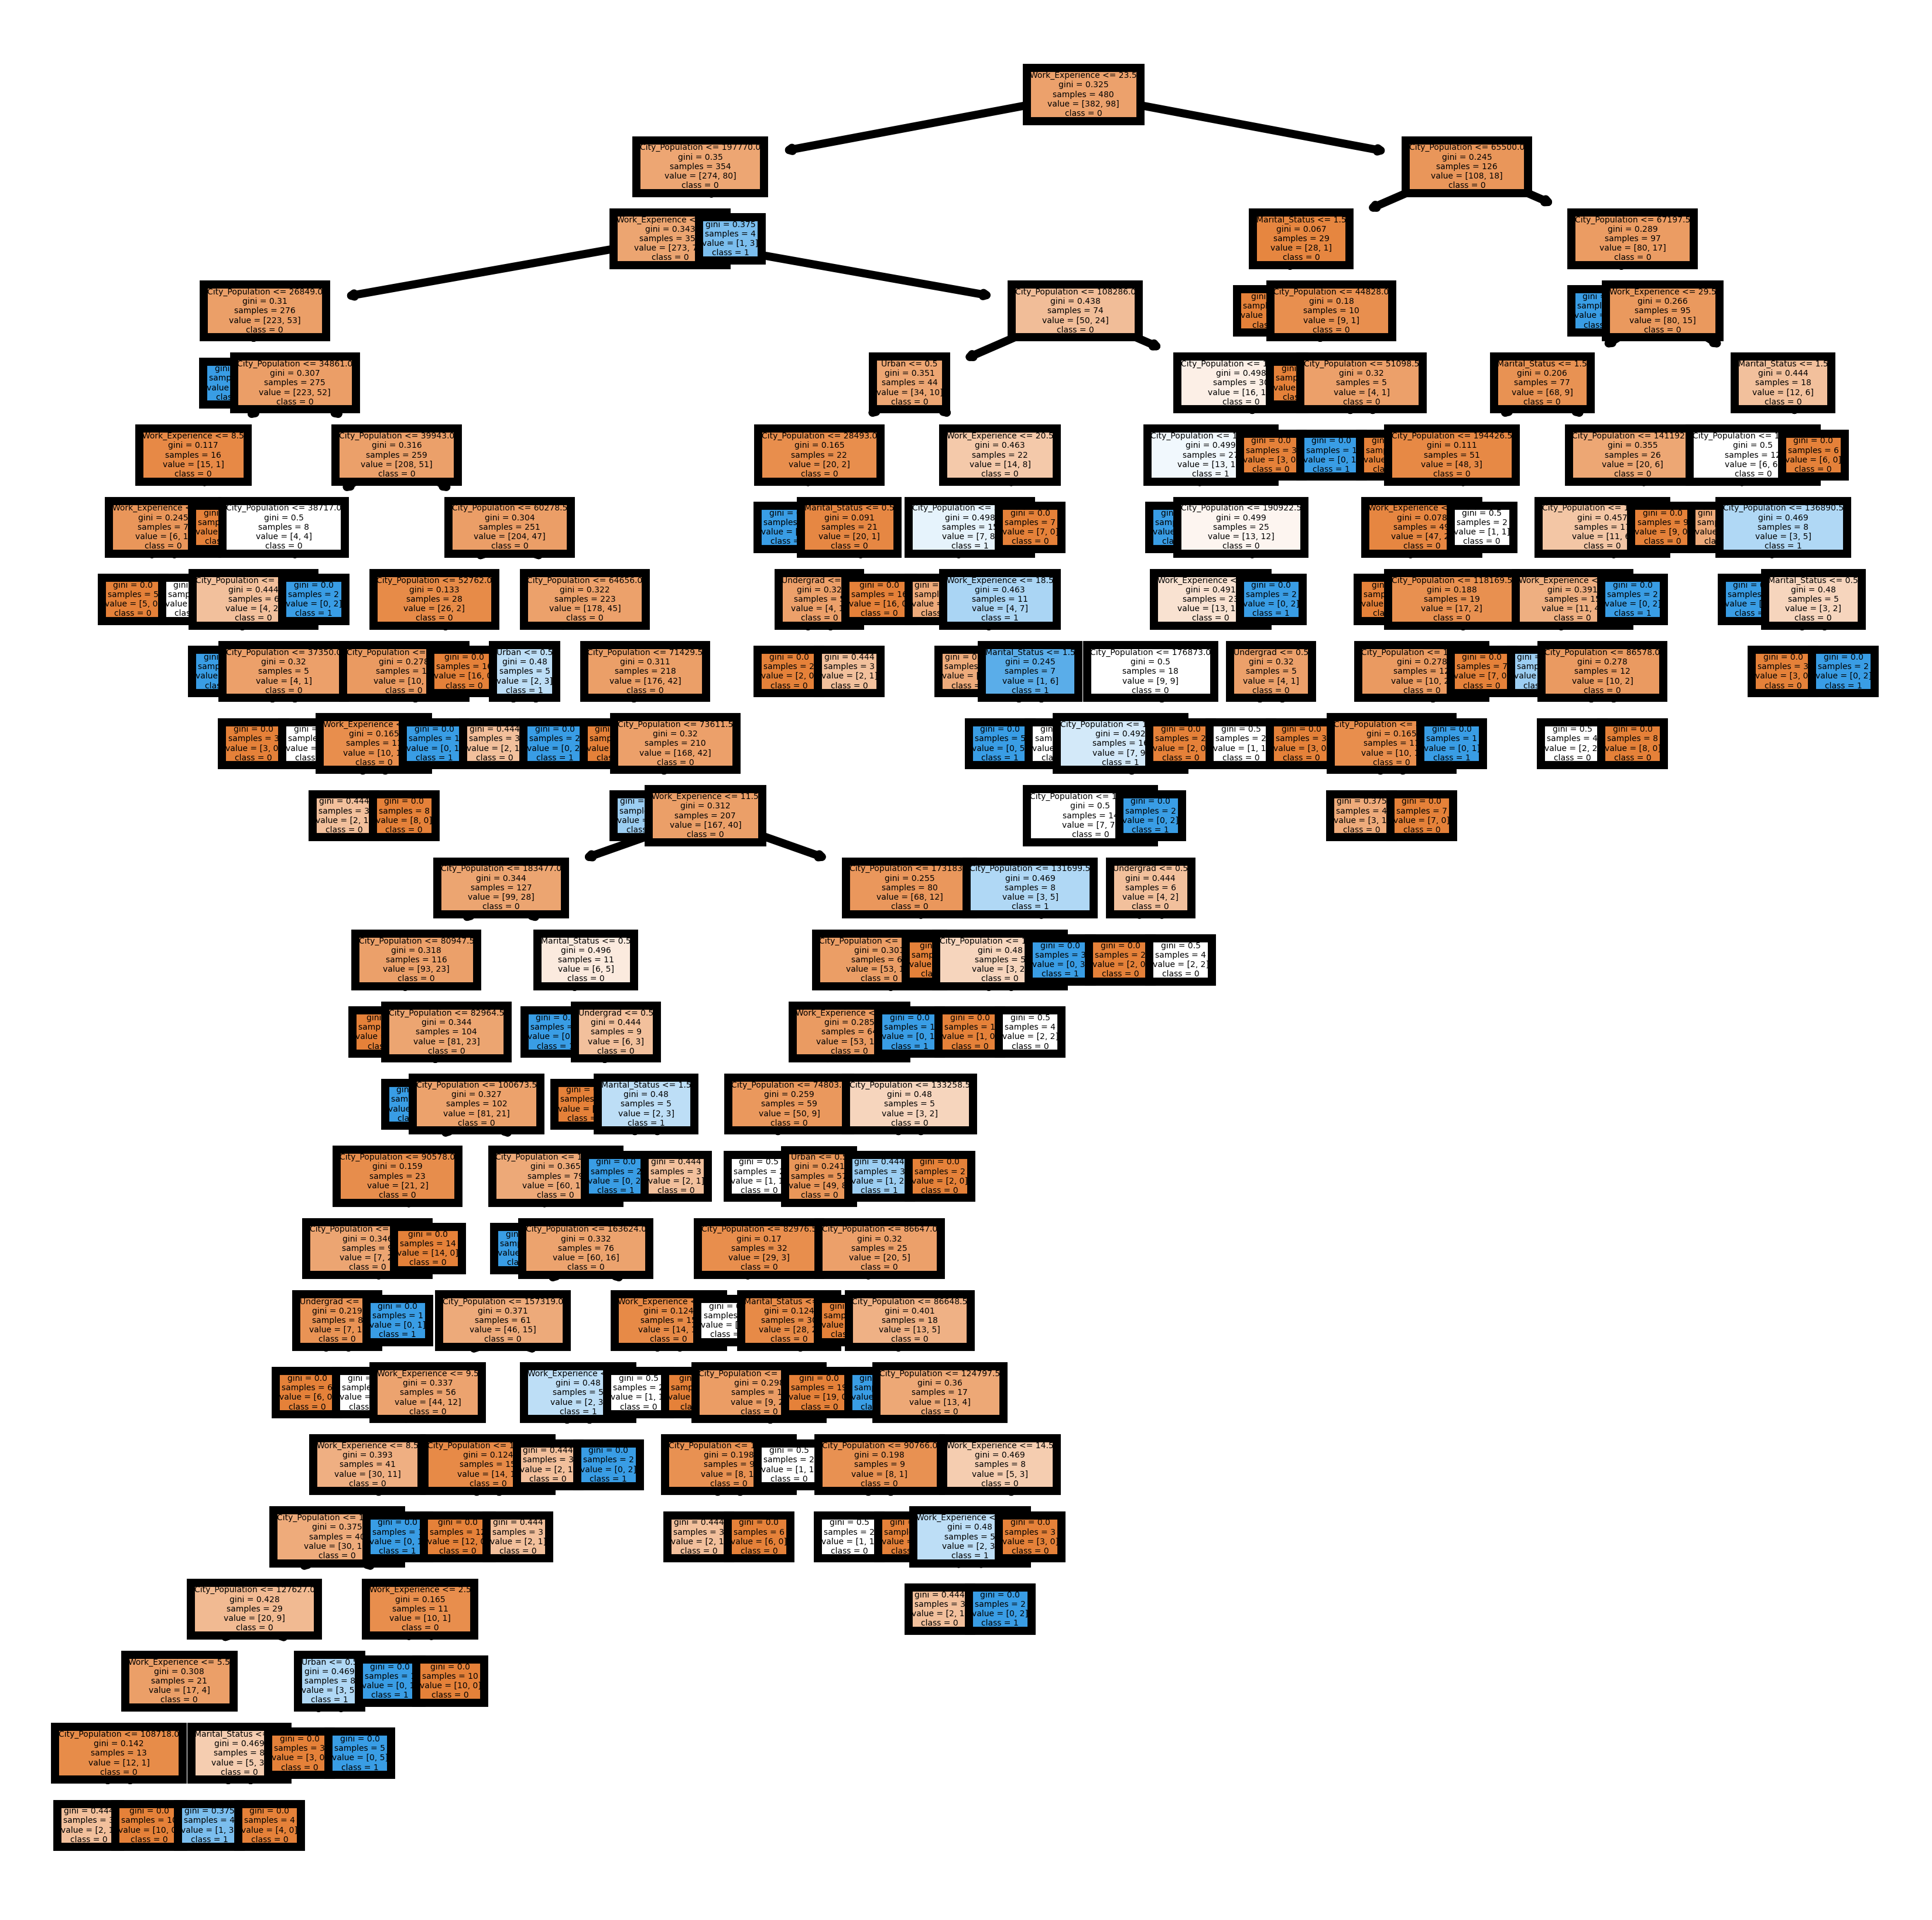

In [45]:
fn=['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience','Urban']
cn=['0','1']
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
plt.show()

# Building Decision Tree Classifier (CART) using entropyCriteria

In [46]:
model2 = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [47]:
preds = model2.predict(x_test)  
pd.Series(preds).value_counts() 

Good     101
Risky     19
dtype: int64

In [48]:
#Prediction the model
preds=model2.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.7083333333333334

In [49]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.79      0.85      0.82        94
       Risky       0.26      0.19      0.22        26

    accuracy                           0.71       120
   macro avg       0.53      0.52      0.52       120
weighted avg       0.68      0.71      0.69       120



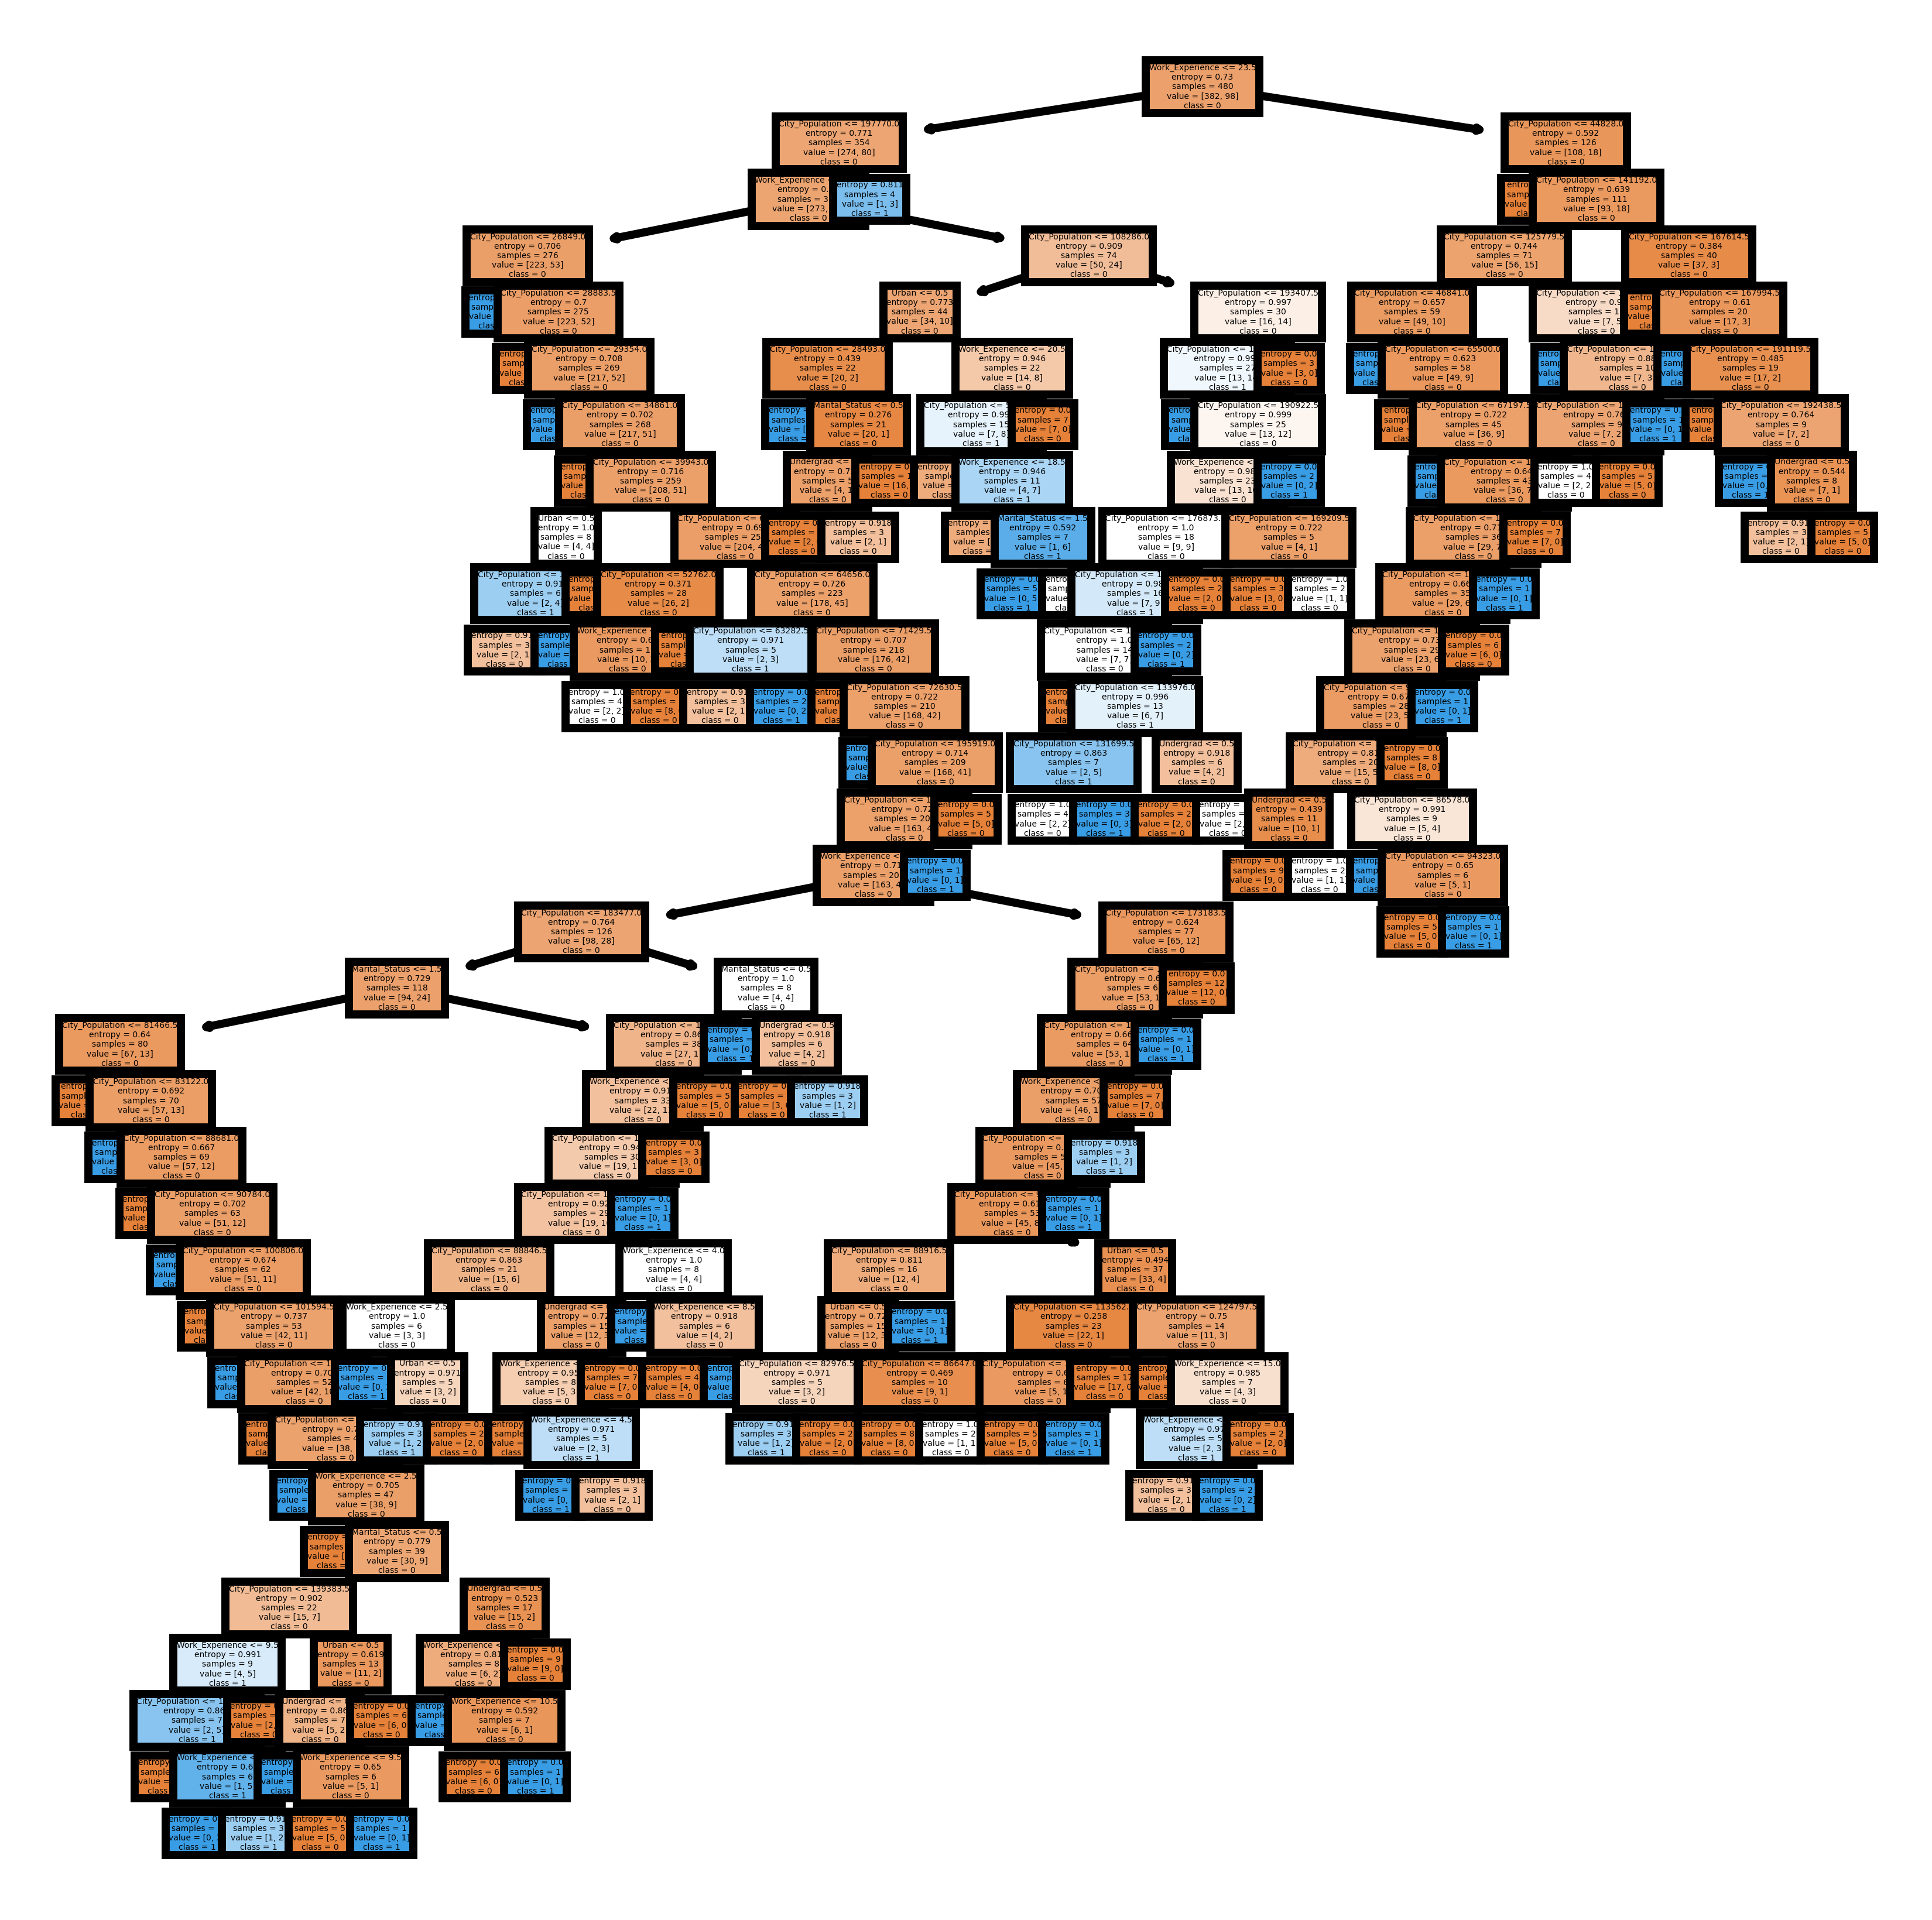

In [50]:
fn=['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience','Urban']
cn=['0','1']
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model2,feature_names = fn,class_names=cn,filled = True);
plt.show()